In [1]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
import logging
import time
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind

In [2]:
conn=sqlite3.connect("mydatabase.db") #connected
df=pd.read_sql_query("select * from vendor_summery",conn)
# df.head(10)

In [3]:
df.head(10)

,VendorNumber,VendorName,Brand,PurchasePrice,Description,Actual_price,Volume,TotalPurchaseQuantity,Total_Purchase_Dollars,Total_Sales_Quantity,Total_Sales_Dollars,Total_Sales_Price,Total_Excise_Tax,TotalFreight,Profit,ROI,Profit_Margin,StockTurnover,Sales_Per_Purchase
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.338647,25.297693,-3031.0,0.979108
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.266830,21.062810,-3791.0,0.976890
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.327594,24.675786,-267.0,0.998575
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.372493,27.139908,-1270.0,0.993703
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.396897,28.412764,-2271.0,0.983556
5,480,BACARDI USA INC,3858,17.77,Grey Goose Vodka,23.99,750.0,138809,2466635.93,141860.0,3383912.40,446932.09,111699.19,89286.27,917276.47,0.371873,27.106980,3051.0,1.021980
6,17035,PERNOD RICARD USA,2589,30.76,Jameson Irish Whiskey,39.99,1750.0,70783,2177285.08,69627.0,2773367.73,614529.34,127931.67,123780.22,596082.65,0.273773,21.493098,-1156.0,0.983668
7,3960,DIAGEO NORTH AMERICA INC,3102,12.94,Smirnoff Traveler,17.99,1750.0,161386,2088334.84,148265.0,2592041.35,292586.29,272422.60,257032.07,503706.51,0.241200,19.432812,-13121.0,0.918698
8,3960,DIAGEO NORTH AMERICA INC,3489,20.73,Tanqueray,27.99,1750.0,91835,1903739.55,90481.0,2640491.19,503661.02,166244.44,257032.07,736751.64,0.387002,27.902068,-1354.0,0.985256
9,12546,JIM BEAM BRANDS COMPANY,1376,16.29,Jim Beam,21.99,1750.0,108866,1773427.14,107061.0,2435393.39,426902.78,196707.35,123880.97,661966.25,0.373269,27.181081,-1805.0,0.983420


now for exploratory data analysis.. 
we hv to ork on final table to make more data patterns,data quality,good data insight 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
Actual_price,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
Total_Purchase_Dollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
Total_Sales_Quantity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
Total_Sales_Dollars,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
Total_Sales_Price,10692.0,18793.783627,44952.773386,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05


In [5]:
df.rename(columns={'TotalFreight': 'Total_Freight'}, inplace=True)


ValueError: num must be an integer with 1 <= num <= 16, not 17

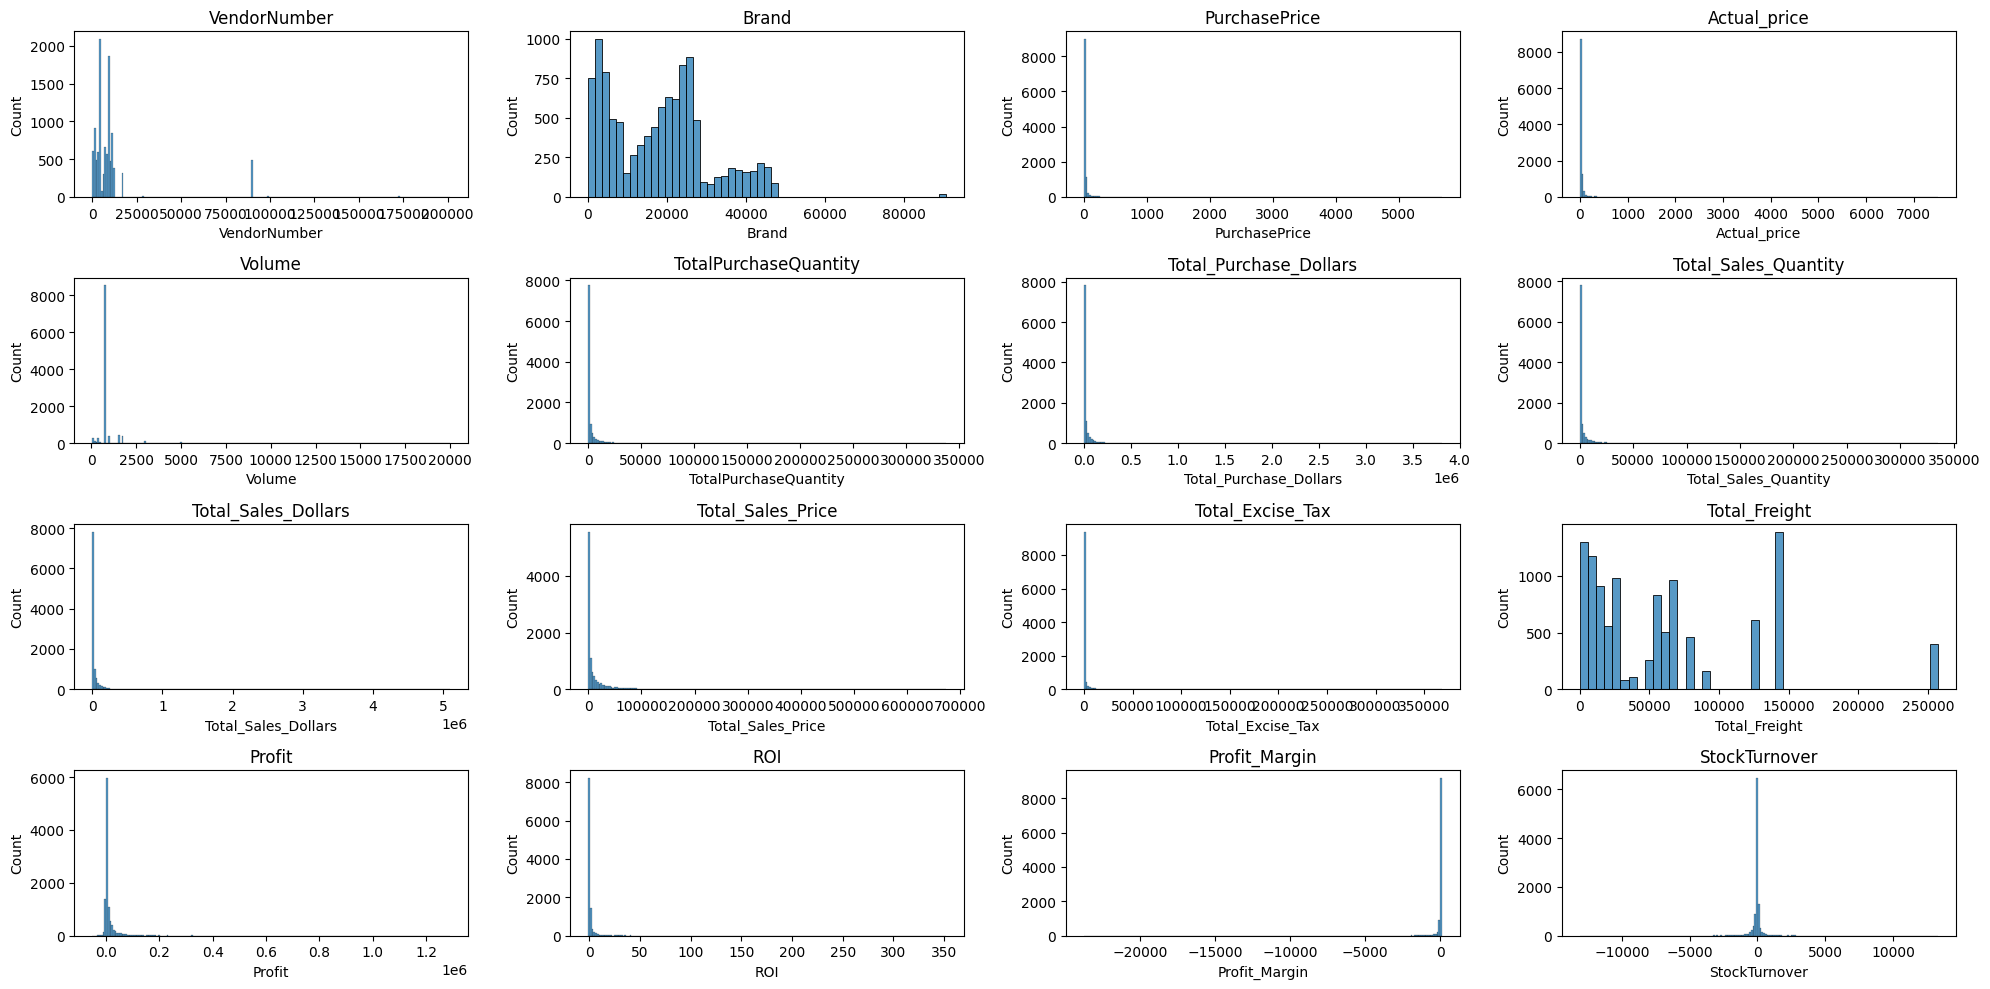

In [6]:
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(20, 10))
for i ,col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(x=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 16, not 17

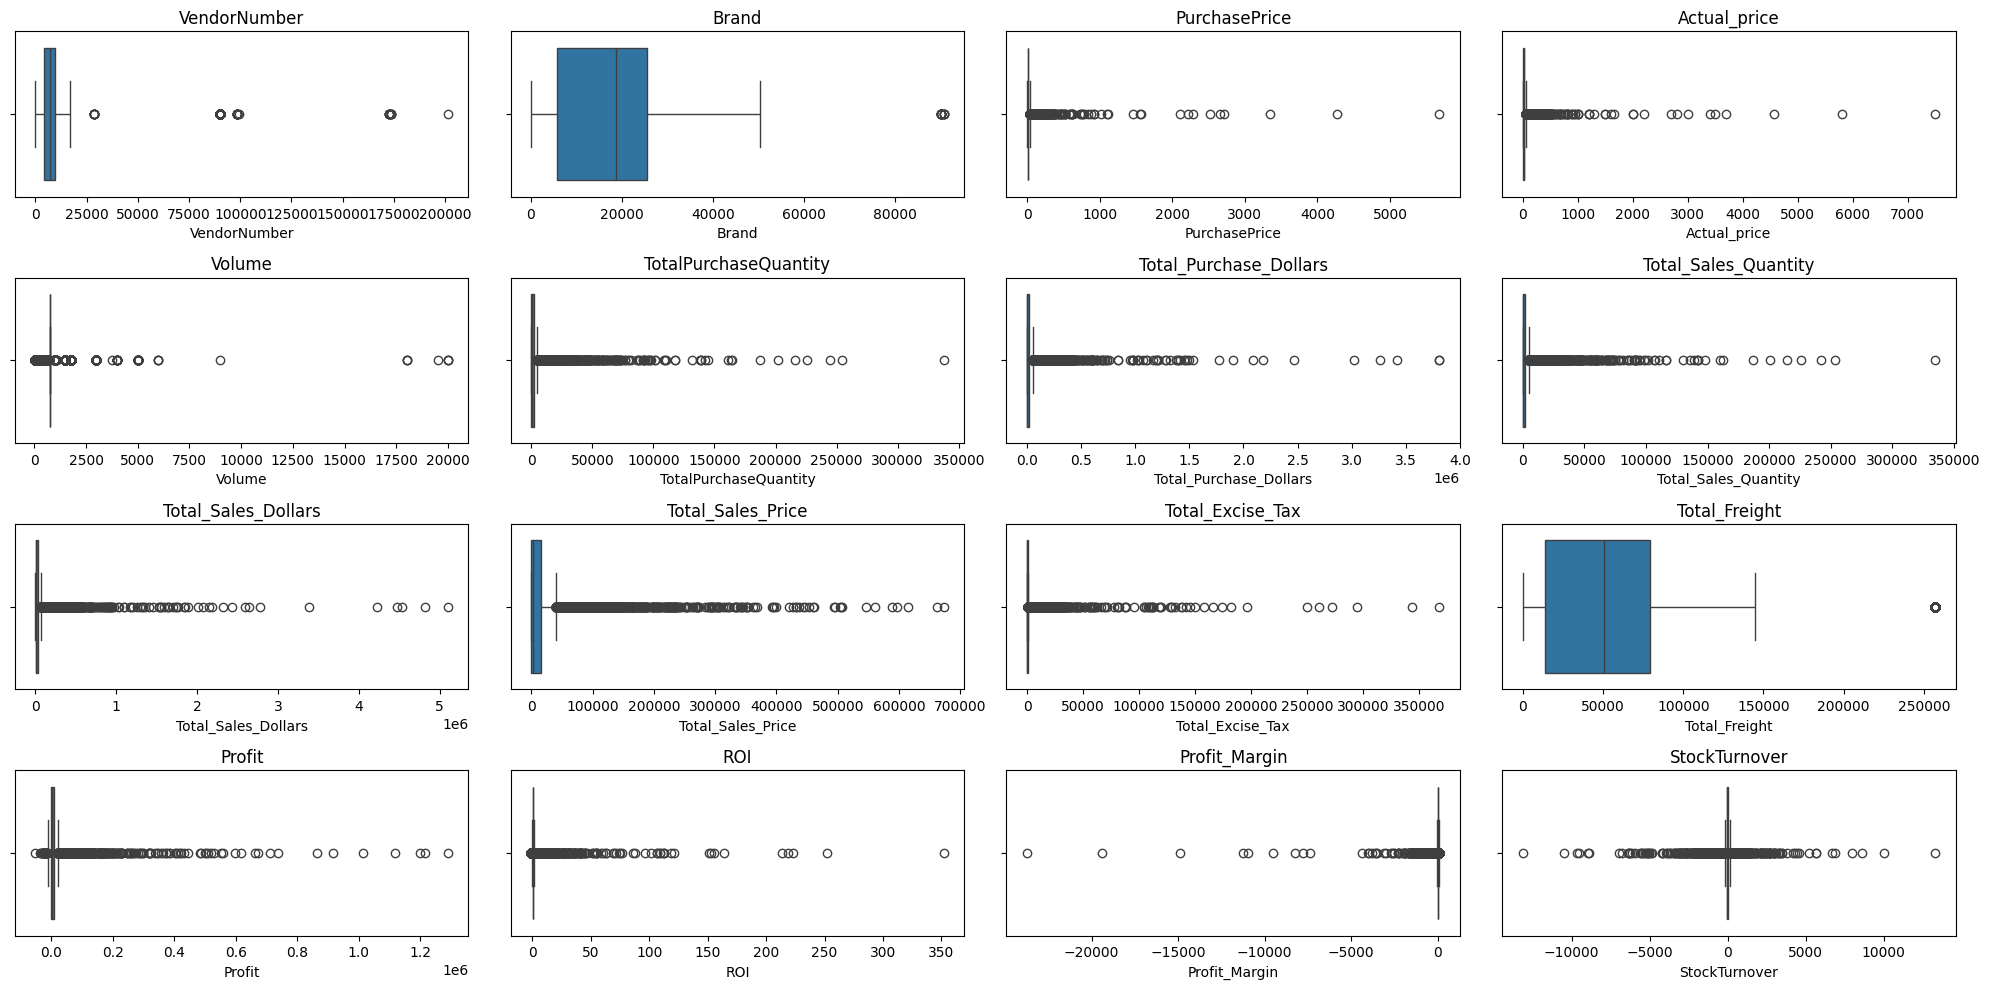

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(20, 10))
for i ,col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
df=pd.read_sql_query("""select * from vendor_summery
 where Profit>0 and Profit_Margin>0 and Total_Sales_Quantity>0""",conn)

In [ ]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Description,Actual_price,Volume,TotalPurchaseQuantity,Total_Purchase_Dollars,Total_Sales_Quantity,Total_Sales_Dollars,Total_Sales_Price,Total_Excise_Tax,TotalFreight,Profit,ROI,Profit_Margin,StockTurnover,Sales_Per_Purchase
0,1128,BROWN-FORMAN CORP,1233,26.27,Jack Daniels No 7 Black,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.338647,25.297693,-3031.0,0.979108
1,4425,MARTIGNETTI COMPANIES,3405,23.19,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.266830,21.062810,-3791.0,0.976890
2,17035,PERNOD RICARD USA,8068,18.24,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.327594,24.675786,-267.0,0.998575
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.372493,27.139908,-1270.0,0.993703
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.396897,28.412764,-2271.0,0.983556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,5.041667,83.448276,3.0,2.500000
8560,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,27.059829,96.436186,128.0,22.333333
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,0.337838,25.252525,0.0,1.000000
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,96.469388,98.974037,71.0,72.000000


Index(['VendorName', 'Description'], dtype='object')

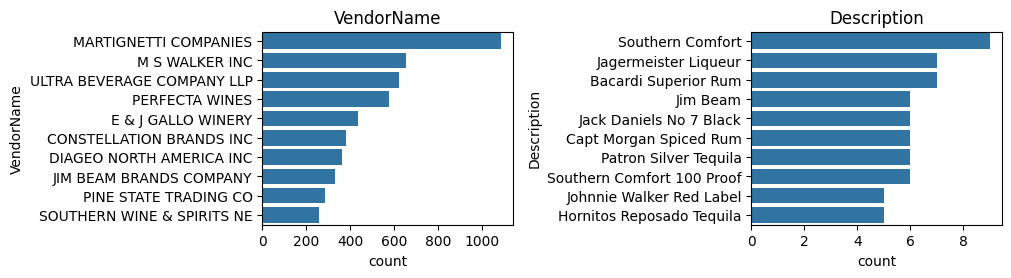

In [ ]:
#for catagorical data
cat_cols = df.select_dtypes(include='object').columns
display(cat_cols) #cat_cols
plt.figure(figsize=(20, 10))
for i ,col in enumerate(cat_cols):
    plt.subplot(4, 4, i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(col)
    plt.tight_layout()
plt.show()
df=pd.read_sql_query("""select * from vendor_summery
 where Profit>0 and Profit_Margin>0 and Total_Sales_Quantity>0""",conn)

In [ ]:
# # for correlation
# plt.figure(figsize=(20, 10))
# sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.8,fmt='.2f')
# plt.title("Correlation Heatmap")
# plt.show()

KeyError: "['Total_Freight'] not in index"

<Figure size 2000x1000 with 0 Axes>

Identify Brands that needs promotional or pricing Adjustmnets which exhiibit lower sales but higher profit margin...

In [ ]:
Brand_performance=df.groupby("Description").agg({"Total_Sales_Dollars":"sum","Profit_Margin":"mean"})#.sort_values("Total_Sales_Dollars",ascending=False)

In [ ]:
low_sales_threshold=Brand_performance["Total_Sales_Dollars"].quantile(0.10)
high_margin_threshold=Brand_performance["Profit_Margin"].quantile(0.85)
print("low_sales_threshold",low_sales_threshold,"high_margin_threshold",high_margin_threshold)

low_sales_threshold 341.6 high_margin_threshold 64.97017552750113


In [ ]:
target_brands=Brand_performance[(Brand_performance["Total_Sales_Dollars"]<=low_sales_threshold) & (Brand_performance["Profit_Margin"]>=high_margin_threshold)]
print("target_brands(with low sales but high profit margin:)",target_brands.sort_values("Total_Sales_Dollars",ascending=False))

target_brands(with low sales but high profit margin:)                               Total_Sales_Dollars  Profit_Margin
Description                                                     
Jaboulet Crozes Herm 10 Thal               335.93      90.724258
Mimosa by St Clair Winery                  335.76      67.333810
Ch La Dom St Emil Gr Cru 09                334.95      73.333333
Ch Musar Hochar Red                        329.89      81.448362
Tiki Sound Svgn Bl                         326.71      67.751217
...                                           ...            ...
Sauza Sprklg Wild Berry Marg                27.96      82.153076
Crown Royal Apple                           27.86      89.806174
Concannon Glen Ellen Wh Zin                 15.95      83.448276
Debauchery Pnt Nr                           11.58      65.975820
Santa Rita Organic Svgn Bl                   9.99      66.466466

[119 rows x 2 columns]


In [ ]:
Brand_performance = Brand_performance[Brand_performance["Total_Sales_Dollars"] < 1000]

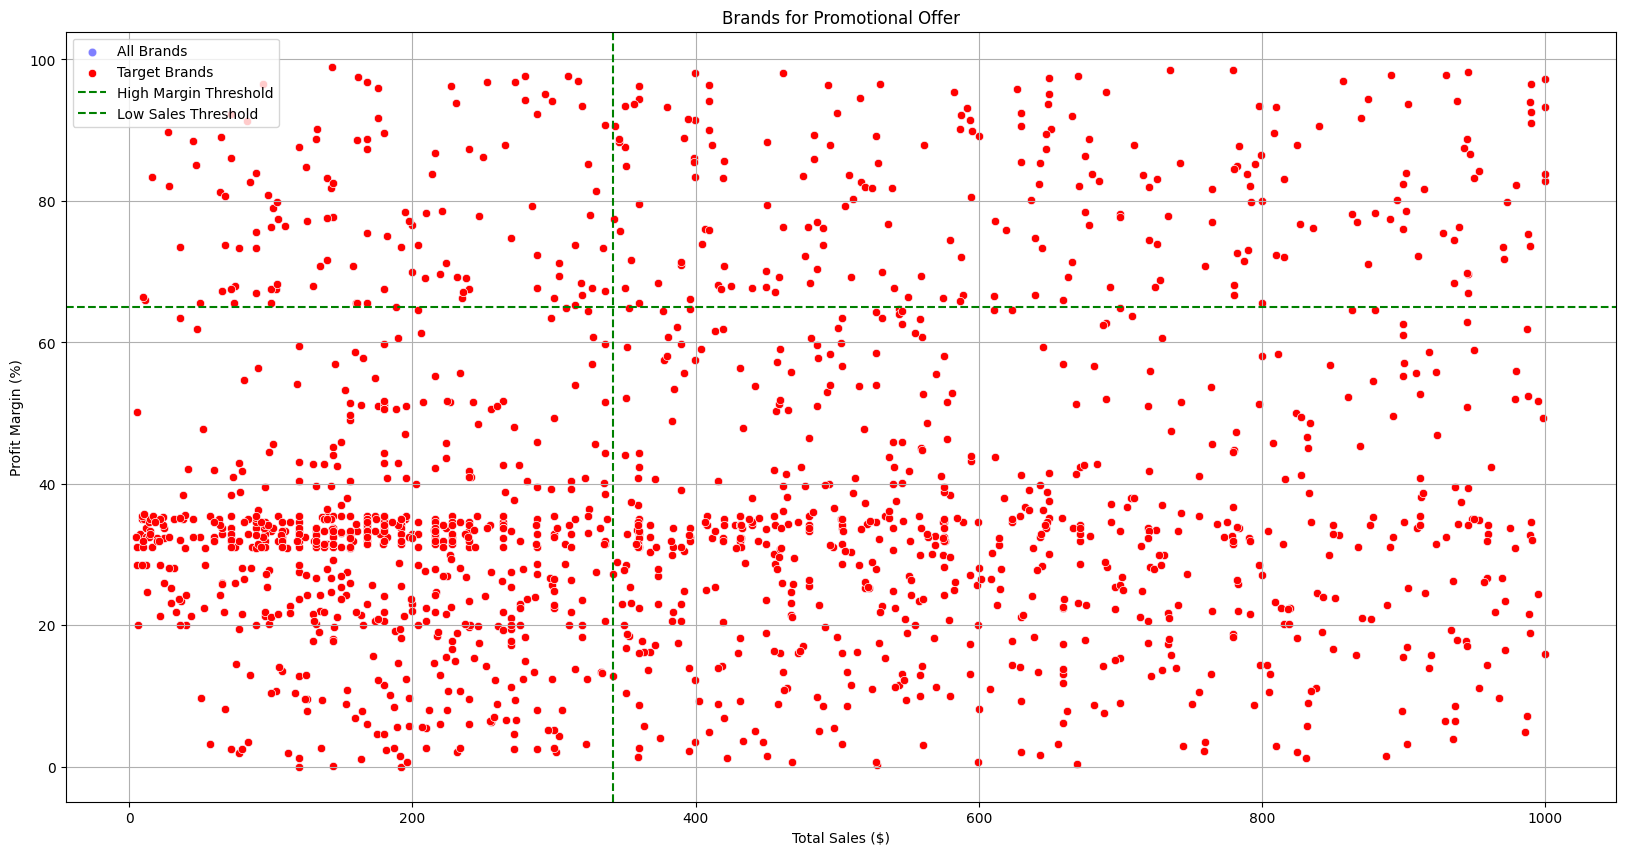

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=Brand_performance,x="Total_Sales_Dollars",y="Profit_Margin",color="blue",label="All Brands",alpha=0.5)
sns.scatterplot(data=Brand_performance,x="Total_Sales_Dollars",y="Profit_Margin",color="red",label="Target Brands")
plt.axhline(y=high_margin_threshold,ls="--",color="green",label="High Margin Threshold")
plt.axvline(x=low_sales_threshold,ls="--",color="green",label="Low Sales Threshold")
plt.legend()
plt.grid(True)
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional Offer")
plt.show()

In [ ]:
top_10_brands=Brand_performance.sort_values("Total_Sales_Dollars",ascending=False).head(10)
print("top_10_brands",top_10_brands)

top_10_brands                               Total_Sales_Dollars  Profit_Margin
Description                                                     
Ch de Beaucastel Pape Blanc                999.92      82.876630
Margaritaville Coconut                     999.81      15.928026
Galerie Latro Cab S Knights                999.80      93.332667
Marques de Grinon 10 Cab Svg               999.75      83.783946
Steph Avrn Chn Vielles Vig                 999.50      97.278639
Hartford Court Chard RRV                   998.61      49.259471
Valentin Bianchi Elsa Malbec               995.17      24.370711
Murphy-Goode All In Claret                 994.53      51.748062
Liberty Crk Vyd Pnt Grigio                 990.73      32.042030
Fonseca Porto 11                           989.89      34.637182


In [ ]:
top_brand=df.groupby("Description")["Total_Sales_Dollars"].sum().nlargest(10)
top_vendors=df.groupby("VendorName")["Total_Sales_Dollars"].sum().nlargest(10)
# print("top_10_brands",top_10_brands," \n")
print("top_brand",top_brand," \n")
print("top_vendors",top_vendors)

top_brand Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: Total_Sales_Dollars, dtype: float64  

top_vendors VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: Total_Sales_Dollars, dtype: float64


In [ ]:
def format_number(num):
    try:
        num = float(num)
    except (ValueError, TypeError):
        return str(num)
    if num >= 1000000:
        return f"{num / 1000000:.2f}M"
    elif num >= 1000:
        return f"{num / 1000:.2f}K"
    else:
        return f"{num:.2f}"

In [ ]:
top_vendors=top_vendors.apply(format_number)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: Total_Sales_Dollars, dtype: object

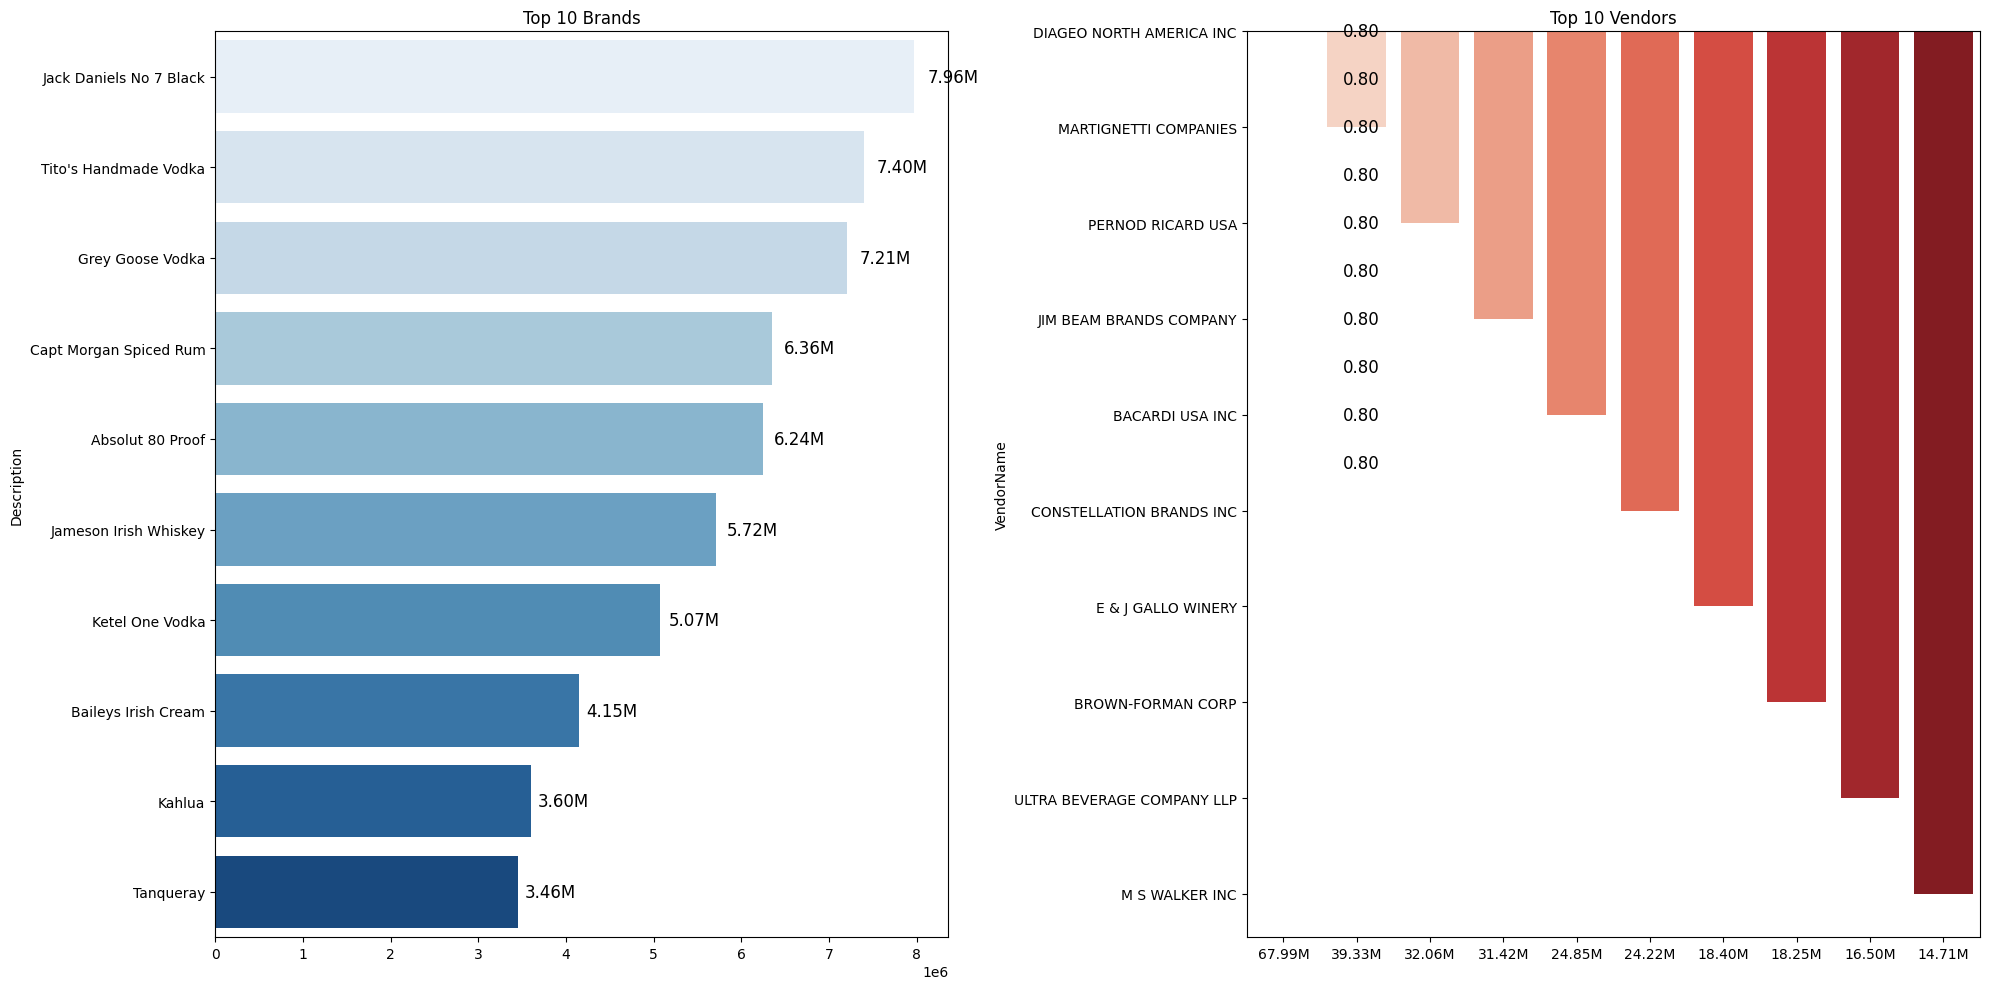

In [ ]:
plt.figure(figsize=(20, 10))

# ---------- Plot 1: Top 10 Brands ----------
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=top_brand.values, y=top_brand.index, palette="Blues")
plt.title("Top 10 Brands")

for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + height / 2,
        format_number(bar.get_width()),  # Proper formatted value
        ha='left', va='center', color='black', fontsize=12
    )

# ---------- Plot 2: Top 10 Vendors ----------
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="Reds")
plt.title("Top 10 Vendors")

for bar in ax2.patches:
    height = bar.get_height()
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + height / 2,
        format_number(bar.get_width()),
        ha='left', va='center', color='black', fontsize=12
    )

plt.tight_layout()
plt.show()


In [ ]:
vendor_performance=df.groupby("VendorName").agg({"Total_Purchase_Dollars":"sum","Total_Sales_Dollars":"sum","Profit":"sum"}).reset_index()#.sort_values("Total_Sales_Dollars",ascending=False)

In [ ]:
vendor_performance["Purchase_Contribution%"]=(vendor_performance["Total_Purchase_Dollars"]/vendor_performance["Total_Purchase_Dollars"].sum())*100

In [ ]:
vendor_performance.sort_values("Purchase_Contribution%",ascending=False).head(10)

,VendorName,Total_Purchase_Dollars,Total_Sales_Dollars,Profit,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,67990099.42,17892873.26,16.300345
57,MARTIGNETTI COMPANIES,25502095.83,39330359.36,13828263.53,8.297724
68,PERNOD RICARD USA,23851164.17,32063196.19,8212032.02,7.760554
46,JIM BEAM BRANDS COMPANY,23494304.32,31423020.46,7928716.14,7.644441
6,BACARDI USA INC,17432020.26,24854817.14,7422796.88,5.671930
20,CONSTELLATION BRANDS INC,15273708.08,24218745.65,8945037.57,4.969671
11,BROWN-FORMAN CORP,13238939.18,18247230.65,5008291.47,4.307609
30,E & J GALLO WINERY,12068539.22,18399899.46,6331360.24,3.926791
106,ULTRA BEVERAGE COMPANY LLP,11167081.61,16502544.31,5335462.70,3.633480
53,M S WALKER INC,9764312.60,14706458.51,4942145.91,3.177055


In [ ]:
vendor_performance=round(vendor_performance.sort_values("Purchase_Contribution%",ascending=False).head(10),2)

In [ ]:
# vendor_performance.drop(columns=["Purchase_Contribution"],inplace=True)

In [ ]:
top_vendors=vendor_performance.head(10)
top_vendors["Total_Purchase_Dollars"]=top_vendors["Total_Purchase_Dollars"].apply(format_number)
top_vendors["Total_Sales_Dollars"]=top_vendors["Total_Sales_Dollars"].apply(format_number)
top_vendors["Profit"]=top_vendors["Profit"].apply(format_number)
display(f"total % of contribution of top 10 vendors {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")
top_vendors


'total % of contribution of top 10 vendors 65.69 %'

,VendorName,Total_Purchase_Dollars,Total_Sales_Dollars,Profit,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18


In [ ]:
top_vendors["Cumulative_Purchase_Contribution%"]=top_vendors["Purchase_Contribution%"].cumsum()
top_vendors

,VendorName,Total_Purchase_Dollars,Total_Sales_Dollars,Profit,Purchase_Contribution%,Cumulative_Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30,24.60
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64,40.00
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31,54.95
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63,62.51
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18,65.69


<Figure size 2000x1000 with 0 Axes>

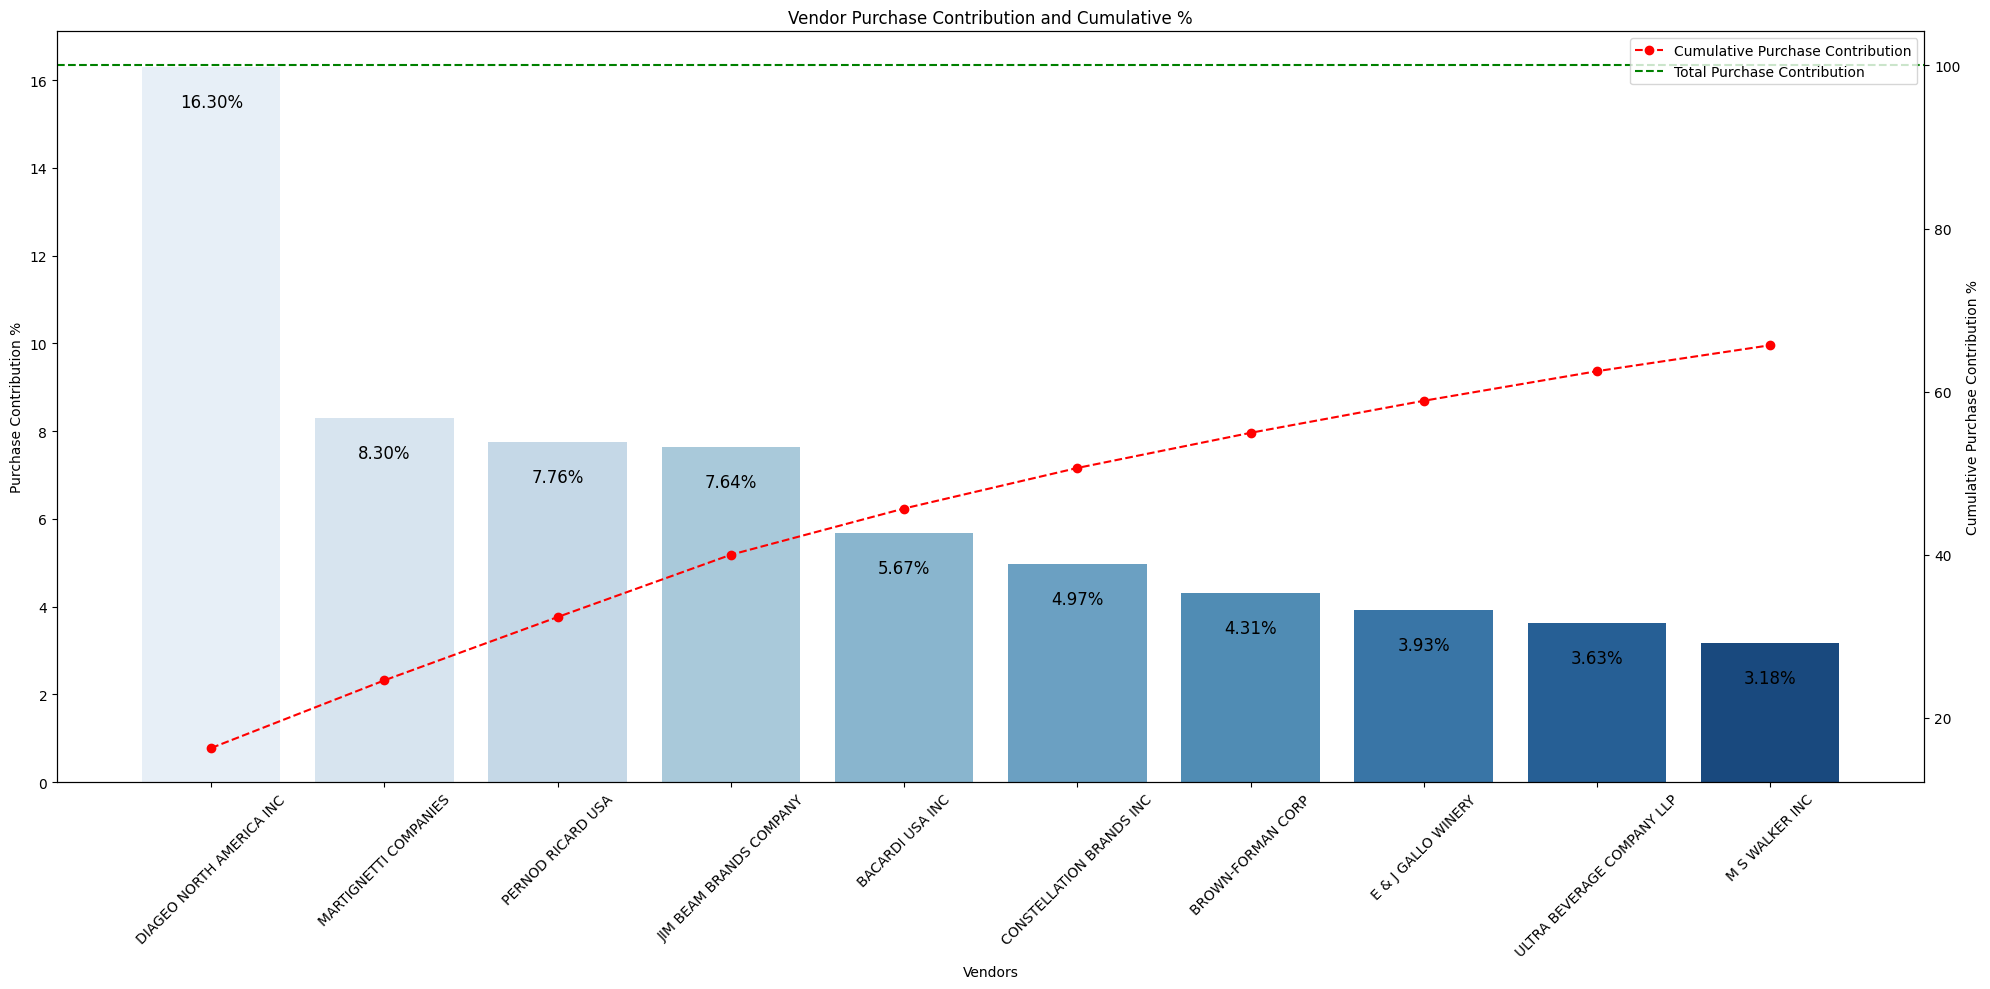

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
fig, ax1 = plt.subplots(figsize=(20, 10))

sns.barplot(x=top_vendors["VendorName"], y=top_vendors["Purchase_Contribution%"], palette="Blues", ax=ax1)

for i, value in enumerate(top_vendors["Purchase_Contribution%"]):
    ax1.text(i, value - 1, f"{value:.2f}%", color="black", ha='center', va='bottom', fontsize=12)
ax2 = ax1.twinx()
ax2.plot(top_vendors["VendorName"], top_vendors["Cumulative_Purchase_Contribution%"],
         color="red", marker="o", label="Cumulative Purchase Contribution", linestyle="--")


ax1.set_xlabel("Vendors")
ax1.set_ylabel("Purchase Contribution %")
ax2.set_ylabel("Cumulative Purchase Contribution %")

ax1.set_xticklabels(top_vendors["VendorName"], rotation=45)
ax2.axhline(y=100, linestyle="--", color="green", label="Total Purchase Contribution")

ax2.legend(loc="upper right")

plt.title("Vendor Purchase Contribution and Cumulative %")
plt.tight_layout()
plt.show()


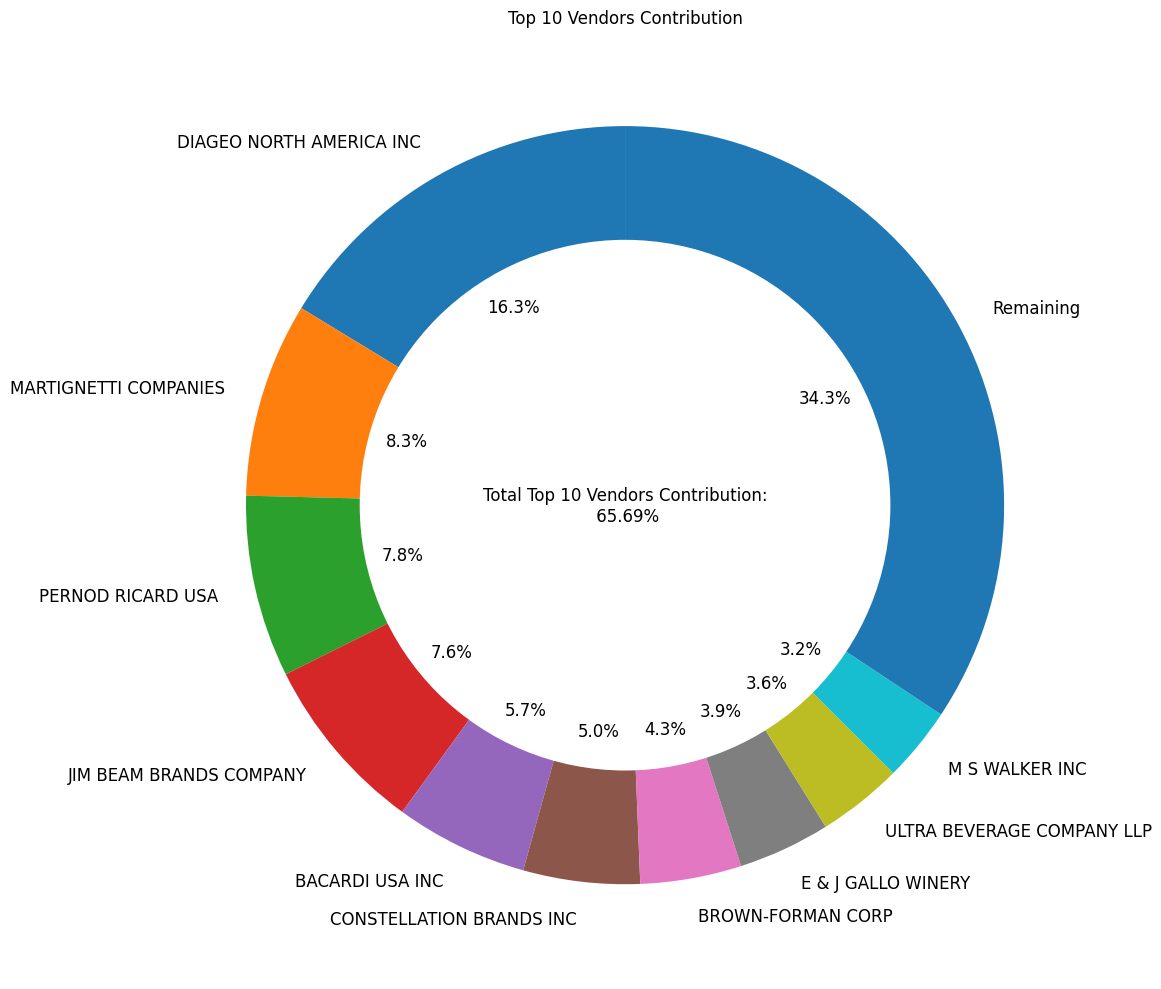

In [ ]:
vendors=list(top_vendors["VendorName"].values)
purchase_contribution=list(top_vendors["Purchase_Contribution%"].values)
total_purchase_contribution=sum(purchase_contribution)
remaining_purchase_contribution=100-total_purchase_contribution

vendors.append("Remaining")
purchase_contribution.append(remaining_purchase_contribution)
fig, ax1 = plt.subplots(figsize=(20, 10))
wedeges, texts, autotexts = ax1.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.text(0, 0, f"Total Top 10 Vendors Contribution:\n {total_purchase_contribution:.2f}%", ha='center', va='center', fontsize=12)
plt.title("Top 10 Vendors Contribution")
plt.tight_layout()
plt.show()

In [ ]:
#discount check..in bulk purchising
df["Unit_Purchase_Cost"]=df["Total_Purchase_Dollars"]/df["TotalPurchaseQuantity"]
df["Order_Size"]=pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])
df["Order_Value"]=pd.qcut(df["Total_Purchase_Dollars"],q=3,labels=["Low","Medium","High"])
# df["Order_size"]


In [ ]:
df[["Order_Size","Order_Value"]]

,Order_Size,Order_Value
0,Large,High
1,Large,High
2,Large,High
3,Large,High
4,Large,High
...,...,...
10687,Small,Low
10688,Small,Low
10689,Small,Low
10690,Small,Low


In [ ]:
df.groupby("Order_Size")[["Unit_Purchase_Cost"]].mean()

,Unit_Purchase_Cost
Order_Size,
Small,43.776954
Medium,17.894005
Large,11.308807


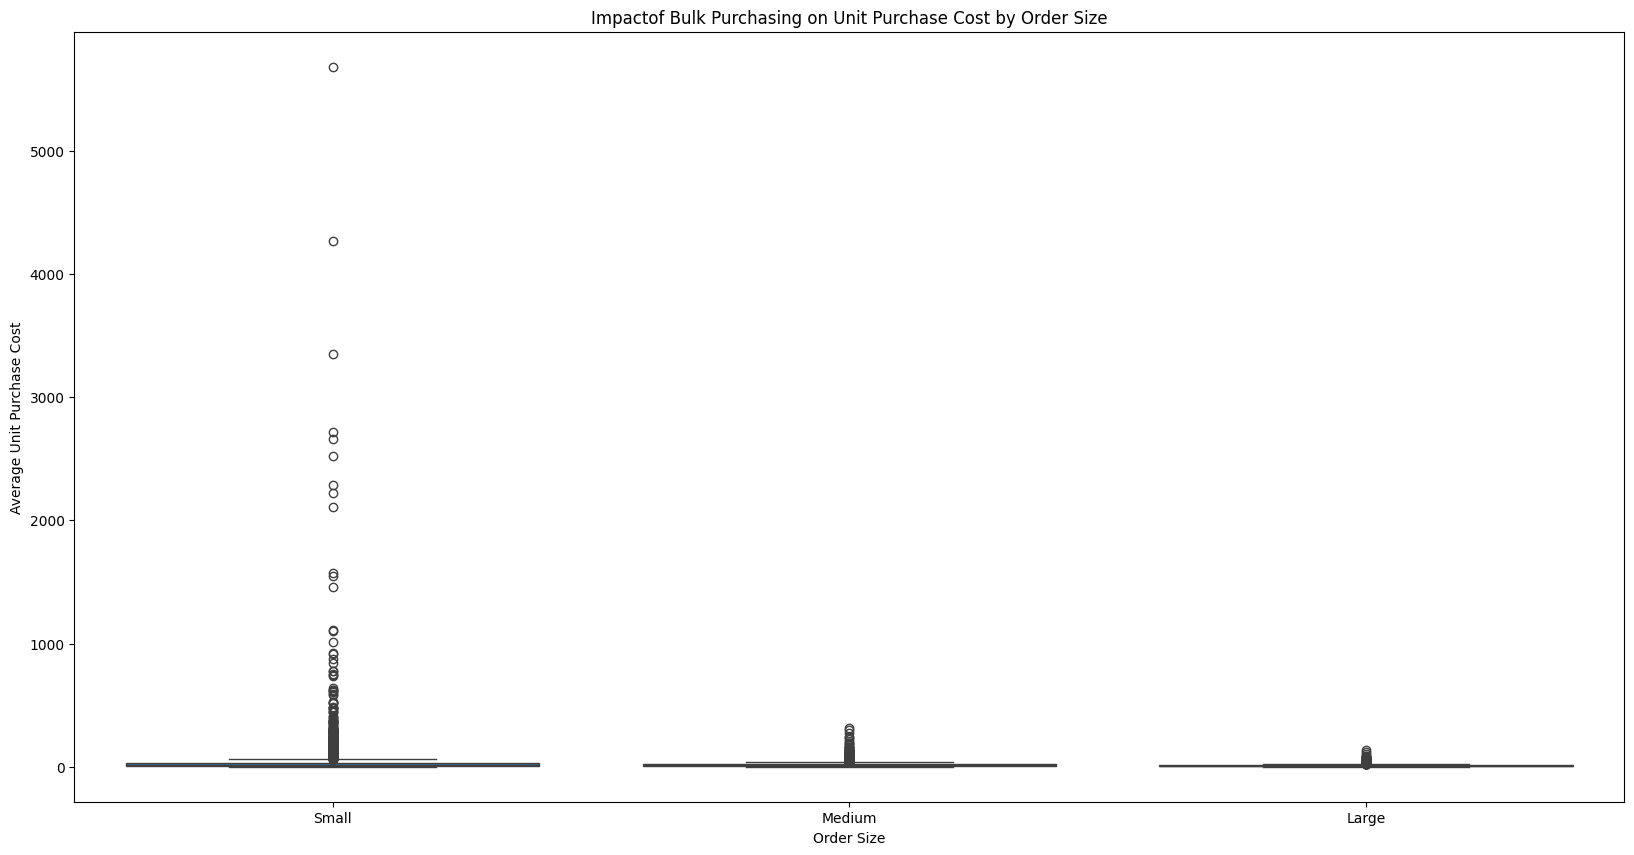

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=df["Order_Size"],y=df["Unit_Purchase_Cost"])
plt.title("Impactof Bulk Purchasing on Unit Purchase Cost by Order Size")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Cost")
plt.show()

In [ ]:
#vendors hv low turnover,excess stock and slow moving products
df[df["StockTurnover"]<1].groupby("VendorName")[["StockTurnover"]].mean().sort_values("StockTurnover",ascending=True).head(10)

,StockTurnover
VendorName,
"STOLI GROUP,(USA) LLC",-1375.818182
WESTERN SPIRITS BEVERAGE CO,-890.400000
DUGGANS DISTILLED PRODUCTS,-771.500000
FABRIZIA SPIRITS LLC,-645.500000
SIDNEY FRANK IMPORTING CO,-641.125000
Russian Standard Vodka,-613.000000
SEA HAGG DISTILLERY LLC,-611.750000
BLACK COVE BEVERAGES,-606.000000
JIM BEAM BRANDS COMPANY,-569.486842


In [ ]:
#unsold in inventory per vendor,which vendor contribute the most
df["Unsold_Inventory"] = (df["TotalPurchaseQuantity"] - df["Total_Sales_Quantity"])*df["PurchasePrice"]
print("Total Unsold Inventory",format_number(df["Unsold_Inventory"].sum()))

Total Unsold Inventory 8.75M


In [ ]:
inventory_value_per_vendor=df.groupby("VendorName")[["Unsold_Inventory"]].sum().reset_index()
inventory_value_per_vendor=inventory_value_per_vendor.sort_values("Unsold_Inventory",ascending=False)
inventory_value_per_vendor["Unsold_Inventory"]=inventory_value_per_vendor["Unsold_Inventory"].apply(format_number)
inventory_value_per_vendor.head(10)
# #inventory_value_per_vendor = (
#     df.groupby("VendorName")["Unsold_Inventory"].sum()
#       .sort_values(ascending=False)
#       .head(10)
#       .reset_index()
#       .assign(Unsold_Inventory=lambda x: x["Unsold_Inventory"].apply(format_number))
# )


,VendorName,Unsold_Inventory
28,DIAGEO NORTH AMERICA INC,980.09K
63,MARTIGNETTI COMPANIES,928.99K
50,JIM BEAM BRANDS COMPANY,857.80K
114,ULTRA BEVERAGE COMPANY LLP,780.27K
73,PERFECTA WINES,571.81K
74,PERNOD RICARD USA,554.74K
59,M S WALKER INC,469.96K
125,WILLIAM GRANT & SONS INC,436.49K
33,E & J GALLO WINERY,315.20K
14,BROWN-FORMAN CORP,284.91K


In [ ]:
#95% confidence intervals for profit_margins of top & low performing vendors
top_threshold=df["Total_Sales_Dollars"].quantile(0.75)
low_threshold=df["Total_Sales_Dollars"].quantile(0.25)
# print("Top 10% Threshold:",top_threshold)
# print("Low 10% Threshold:",low_threshold)   

In [ ]:
top_vendors=df[df["Total_Sales_Dollars"]>=top_threshold]["Profit_Margin"].dropna()
low_vendors=df[df["Total_Sales_Dollars"]<=low_threshold]["Profit_Margin"].dropna()

In [ ]:
top_vendors.describe()

count    2673.000000
mean       30.040583
std        13.526141
min       -59.459436
25%        24.371377
50%        30.689722
75%        36.721291
max        95.012530
Name: Profit_Margin, dtype: float64

In [ ]:
def confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    m = np.mean(data)
    se = stats.sem(data)  # standard error of the mean
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m - h, m + h
    

Top Vendors 95% Confidence Interval: Mean=30.04, Lower=29.53, Upper=30.55
Low Vendors 95% Confidence Interval: Mean=-132.48, Lower=-165.39, Upper=-99.56


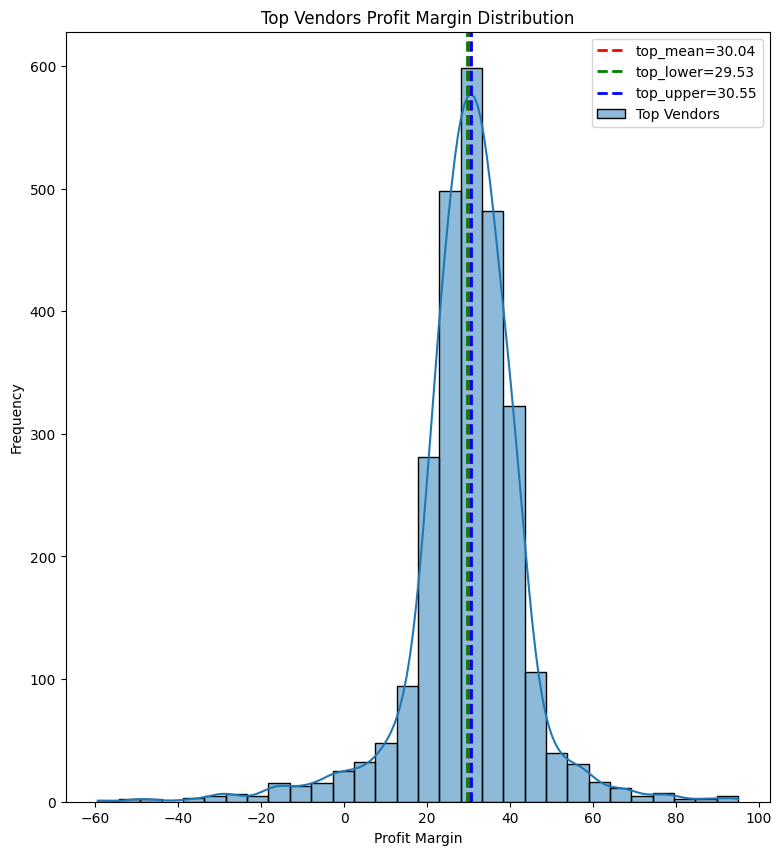

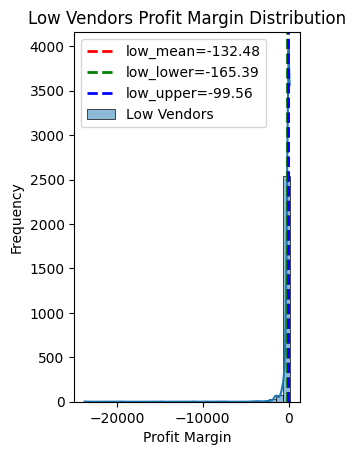

In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)
print(f"Top Vendors 95% Confidence Interval: Mean={top_mean:.2f}, Lower={top_lower:.2f}, Upper={top_upper:.2f}")
print(f"Low Vendors 95% Confidence Interval: Mean={low_mean:.2f}, Lower={low_lower:.2f}, Upper={low_upper:.2f}")
plt.figure(figsize=(20, 10))
#Top Vendors
plt.subplot(1, 2, 1)
sns.histplot(top_vendors, kde=True, bins=30,label="Top Vendors",alpha=0.5)
plt.axvline(top_mean, color='r', linestyle='dashed', linewidth=2, label=f"top_mean={top_mean:.2f}")
plt.axvline(top_lower, color='g', linestyle='dashed', linewidth=2, label=f"top_lower={top_lower:.2f}")
plt.axvline(top_upper, color='b', linestyle='dashed', linewidth=2,label=f"top_upper={top_upper:.2f}")
plt.title("Top Vendors Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.legend()
plt.show()
#Low Vendors
plt.subplot(1, 2, 2)
sns.histplot(low_vendors, kde=True, bins=30,label="Low Vendors",alpha=0.5)
plt.axvline(low_mean, color='r', linestyle='dashed', linewidth=2, label=f"low_mean={low_mean:.2f}")
plt.axvline(low_lower, color='g', linestyle='dashed', linewidth=2, label=f"low_lower={low_lower:.2f}")
plt.axvline(low_upper, color='b', linestyle='dashed', linewidth=2,label=f"low_upper={low_upper:.2f}")
plt.title("Low Vendors Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Top Vendors 95% Confidence Interval: Mean=30.04, Lower=29.53, Upper=30.55
Low Vendors 95% Confidence Interval: Mean=-132.48, Lower=-165.39, Upper=-99.56


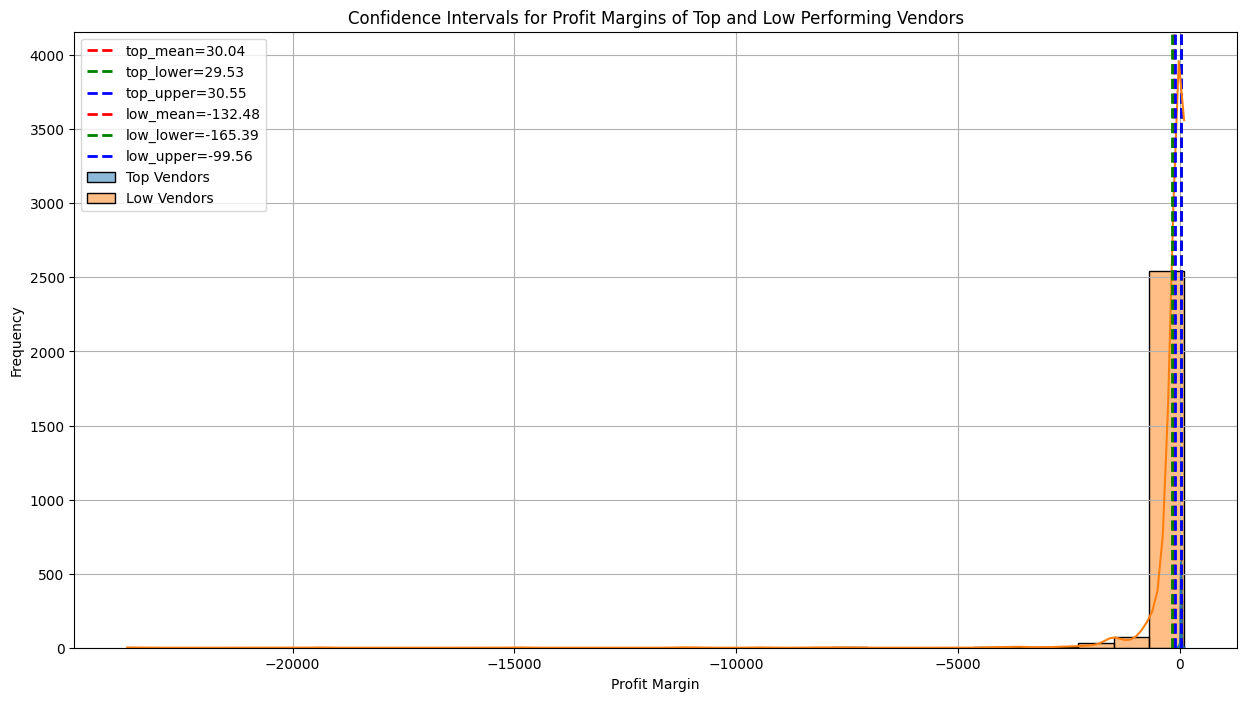

In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)
print(f"Top Vendors 95% Confidence Interval: Mean={top_mean:.2f}, Lower={top_lower:.2f}, Upper={top_upper:.2f}")
print(f"Low Vendors 95% Confidence Interval: Mean={low_mean:.2f}, Lower={low_lower:.2f}, Upper={low_upper:.2f}")
plt.figure(figsize=(15,8))
#Top Vendors
sns.histplot(top_vendors, kde=True, bins=30,label="Top Vendors",alpha=0.5)
plt.axvline(top_mean, color='r', linestyle='dashed', linewidth=2, label=f"top_mean={top_mean:.2f}")
plt.axvline(top_lower, color='g', linestyle='dashed', linewidth=2, label=f"top_lower={top_lower:.2f}")
plt.axvline(top_upper, color='b', linestyle='dashed', linewidth=2,label=f"top_upper={top_upper:.2f}")

#Low Vendors
sns.histplot(low_vendors, kde=True, bins=30,label="Low Vendors",alpha=0.5)
plt.axvline(low_mean, color='r', linestyle='dashed', linewidth=2, label=f"low_mean={low_mean:.2f}")
plt.axvline(low_lower, color='g', linestyle='dashed', linewidth=2, label=f"low_lower={low_lower:.2f}")
plt.axvline(low_upper, color='b', linestyle='dashed', linewidth=2,label=f"low_upper={low_upper:.2f}")

plt.title("Confidence Intervals for Profit Margins of Top and Low Performing Vendors")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

#Null Hypothesis: The average profit margin of top vendors is equal to the average profit margin of low vendors
#Alternative Hypothesis: The average profit margin of top vendors is not equal to the average profit margin of low vendors

In [ ]:
top_threshold=df["Total_Sales_Dollars"].quantile(0.75)
low_threshold=df["Total_Sales_Dollars"].quantile(0.25)
top_vendors=df[df["Total_Sales_Dollars"]>=top_threshold]["Profit_Margin"].dropna()
low_vendors=df[df["Total_Sales_Dollars"]<=low_threshold]["Profit_Margin"].dropna()

# Perform t-test
t_statistic, p_value = stats.ttest_ind(top_vendors, low_vendors, equal_var=False)
print("p-value:", p_value,"t-statistic:", t_statistic)
if p_value < 0.05:
    print("There is a significant difference in profit margin between top and low performing vendors.")
else:
    print("There is no significant difference in profit margin between top and low performing vendors.")


p-value: 8.328797732670908e-22 t-statistic: 9.679919324876236
There is a significant difference in profit margin between top and low performing vendors.


In [ ]:
vendor_summery

NameError: name 'vendor_summery' is not defined